## Import necessary libraries

In [1]:
import os
import sys
import datetime
import pandas as pd

*Note: The module "apex-ua" is not publicly available now, but will be soon.*
- So, we need to import it by setting a path to the module folder.

In [2]:
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(1, path)

In [3]:
from apexua import handler, modules, analyzer

## Specify a path to the working directory

In [4]:
# set a path to UA_Analysis folder
wd = "d:/Projects/Tools/APEX-CUTE/Analysis/test01/UA_Analysis/"

In [5]:
# initiate UA analysis
uam1 = handler.uaInit(wd)

In [6]:
# read settings from the ua config file
info = uam1.read_ua_conf()
info.loc["ReachIDs", "val"] =2
info

,val
idx,
WD,D:\Projects\Tools\APEX-CUTE\Analysis\test01\UA...
Mode,DREAM
Likelihood,Gaussian likelihood: MEO
NumberChains,10
NumberRuns,500
CalibrationStartDate,1/1/2000
CalibrationEndDate,12/31/2003
ObservationFile,rch
ObservationType,Flow(m3/s)


## Run DREAM

Okay, let's run this thing. 

modules.run_dream(info)

In [ ]:
modules.run_fast(info)

Initializing the  Fourier Amplitude Sensitivity Test (FAST)  with  500  repetitions


D:\Projects\Tools\APEX-CUTE\APEX-UA_git\apexua\algorithms\fast_ac.py:105: RuntimeWarning: divide by zero encountered in remainder
  omega[1:] = np.arange(D - 1) % m + 1


Starting the FAST algotrithm with 500 repetitions...
Creating FAST Matrix ...



0it [00:00, ?it/s]

## Explore Results
The "apex-ua" writes lots of usefull information to the `*.csv` file.

In [13]:
# create variable "dra" to initiate getResults function
dra = analyzer.getResults(info)

In [14]:
# create simulation outputs in an appropriate format
dra.create_sims_pars()

Creating CSV files ...
...'DREAM_results.csv' file was created ... passed
...'DREAM_sims.csv' file was created ... passed
...'DREAM_pars.csv' file was created ... passed
Creating CSV files ... finished


In [15]:
# read parameter information
par_df = dra.par_info()

In [16]:
# load all results files as dataframes
all_r, sim_r, par_r = analyzer.load_csv_results() 

### draw parameter

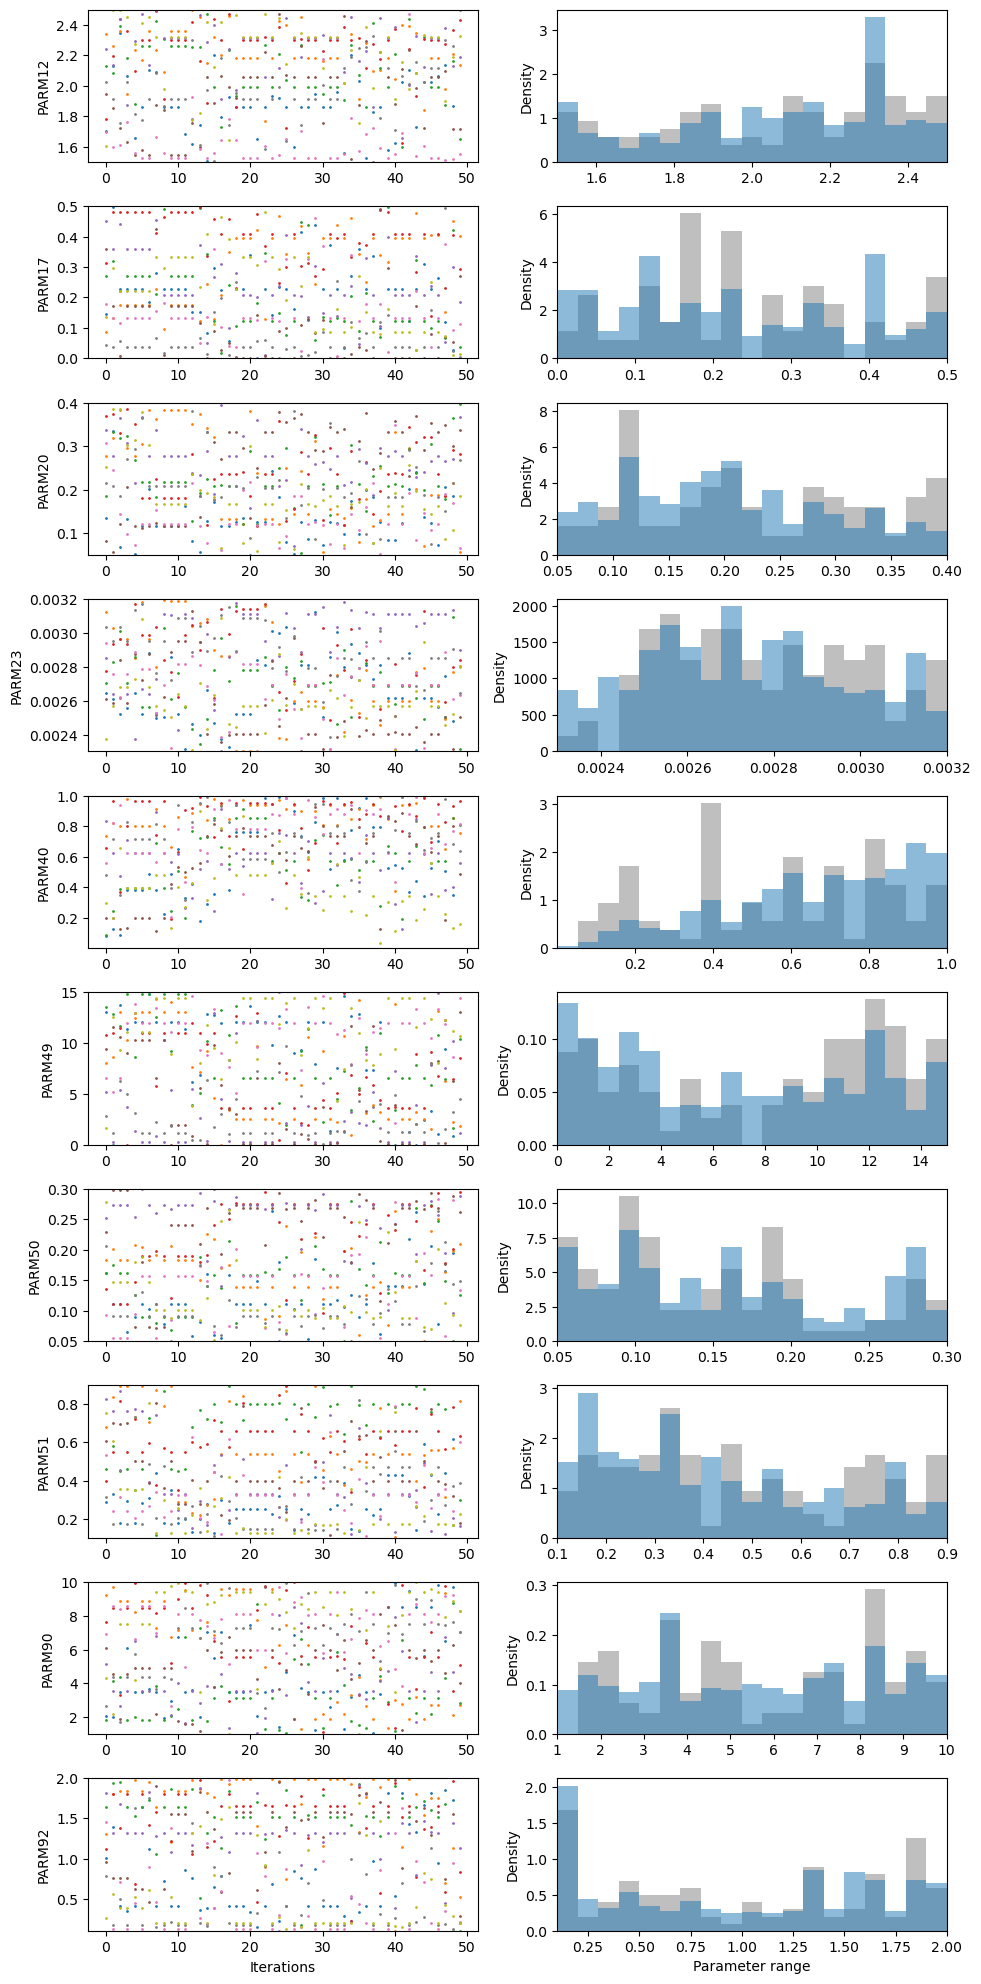

In [17]:
analyzer.plot_parameter_results(par_df, par_r, fig_h=20)

Run number 451 has the highest objectivefunction with: -463.3366


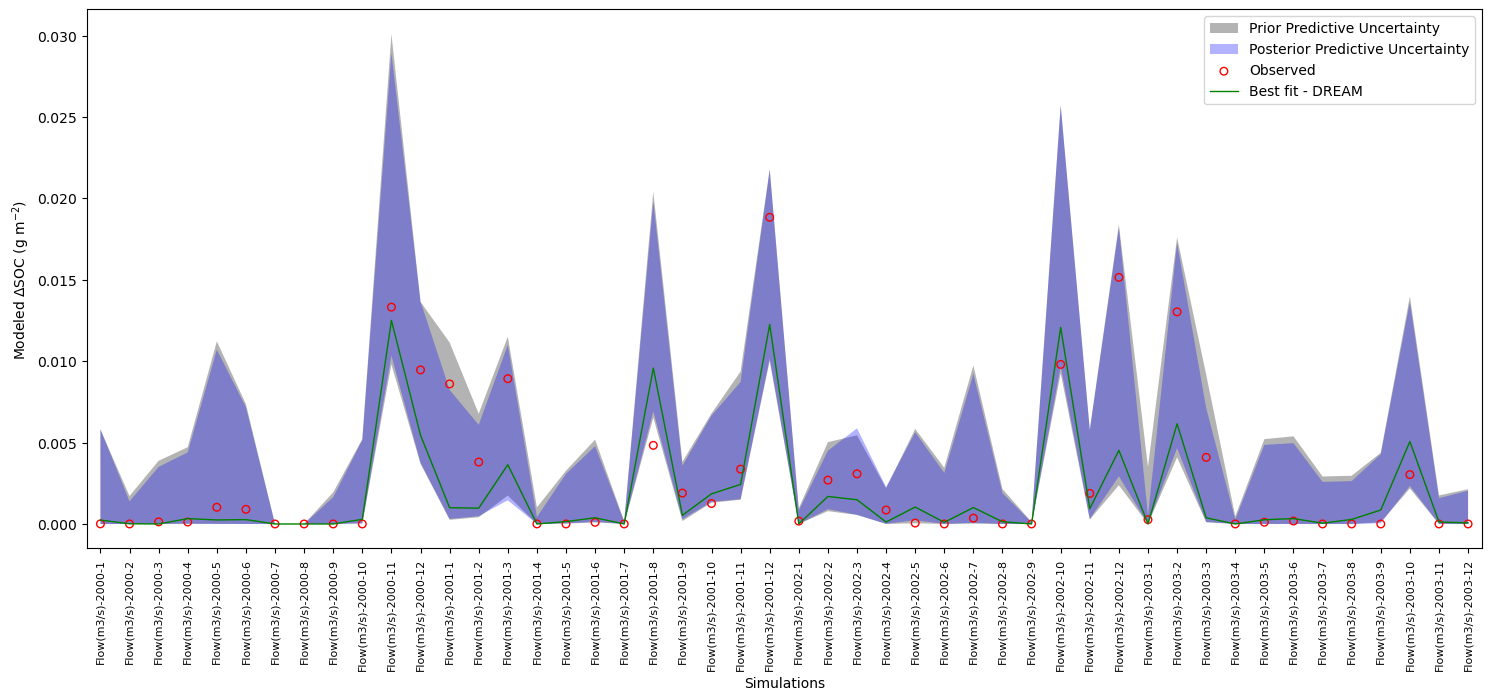

In [20]:
analyzer.plot_predicitive_uncertainty(sim_r, bestfit=True)